## Stock Market Prediction and Forecasting using Stacked LSTM

Stock market prediction and forecasting using Stacked Long Short-Term Memory (LSTM) involves employing deep learning to analyze historical stock prices and predict future movements. LSTM, a type of recurrent neural network, is effective for capturing long-term dependencies in sequential data, making it suitable for time-series forecasting. Stacked LSTMs enhance the model's complexity by using multiple LSTM layers. The process includes data collection, preprocessing, designing a stacked LSTM model, training on historical data, validation, testing, and fine-tuning. However, predicting stock prices is inherently uncertain, and caution should be exercised.

## Author : Mohammed Faheem G

### Importing Required Libraries

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Reading CSV file 

In [5]:
data = pd.read_csv('/kaggle/input/stock-price-prediction/NSE-TATAGLOBAL.csv', index_col='Date')
data

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31


### Performing Normalisation

In [7]:
sc = MinMaxScaler()
for i in data.columns:
    data[i] = sc.fit_transform(data[[i]])
data

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,0.620235,0.622688,0.621560,0.622576,0.624183,0.103951,0.127882
2018-09-27,0.622263,0.626144,0.625285,0.623801,0.622141,0.173002,0.212192
2018-09-26,0.644363,0.639154,0.631078,0.628700,0.626225,0.075513,0.093535
2018-09-25,0.617194,0.625940,0.629009,0.633803,0.633783,0.079233,0.098117
2018-09-24,0.618208,0.635902,0.623836,0.624617,0.622345,0.116080,0.142907
...,...,...,...,...,...,...,...
2010-07-27,0.148013,0.149217,0.132423,0.154317,0.154003,0.018747,0.011808
2010-07-26,0.158151,0.155316,0.153528,0.147377,0.149714,0.021228,0.013334
2010-07-23,0.165045,0.159179,0.166563,0.160645,0.162173,0.008291,0.005443


 ### 1. Splitting the data into train and test set and
 ### 2. Sorting the splitted data

In [35]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=['Close']), 
                                                    data['Close'], test_size = 34)

x_train = x_train.sort_index()
x_test = x_test.sort_index()
y_train = y_train.sort_index()
y_test = y_test.sort_index()

### Creating a Network using LSTM model (as seq)

In [36]:
seq = Sequential()
seq.add(layers.LSTM(45, return_sequences=True, input_shape=(x_train.shape [1],1)))
seq.add(layers.LSTM(45, return_sequences=True))
seq.add(layers.LSTM(45))
seq.add(layers.Dense(1))
seq.compile(optimizer='adam', loss='mse', metrics='accuracy')

### Fitting the train set in the model 

In [37]:
seq.fit(x_train, y_train, epochs=45)

Epoch 1/45
63/63 [==============================] - 6s 10ms/step - loss: 0.0186 - accuracy: 9.9950e-04
Epoch 2/45
63/63 [==============================] - 1s 11ms/step - loss: 2.3212e-04 - accuracy: 9.9950e-04
Epoch 3/45
63/63 [==============================] - 1s 10ms/step - loss: 1.2302e-04 - accuracy: 9.9950e-04
Epoch 4/45
63/63 [==============================] - 1s 11ms/step - loss: 1.0351e-04 - accuracy: 9.9950e-04
Epoch 5/45
63/63 [==============================] - 1s 11ms/step - loss: 1.0574e-04 - accuracy: 9.9950e-04
Epoch 6/45
63/63 [==============================] - 1s 10ms/step - loss: 9.8989e-05 - accuracy: 9.9950e-04
Epoch 7/45
63/63 [==============================] - 1s 11ms/step - loss: 1.1038e-04 - accuracy: 9.9950e-04
Epoch 8/45
63/63 [==============================] - 1s 10ms/step - loss: 9.8602e-05 - accuracy: 9.9950e-04
Epoch 9/45
63/63 [==============================] - 1s 10ms/step - loss: 1.2049e-04 - accuracy: 9.9950e-04
Epoch 10/45
63/63 [======================

### Predictions of y_test and y_pred

In [38]:
y_test = pd.DataFrame(y_test)
y_test

,Close
Date,
2010-08-30,0.149714
2010-10-26,0.189542
2011-02-24,0.026348
2011-03-08,0.051675
2011-08-12,0.087214
2012-02-24,0.159314
2012-08-22,0.207721
2012-09-28,0.252859
2012-10-01,0.264297


In [39]:
y_pred = pd.DataFrame(seq.predict(x_test), index=y_test.index, columns=['Closing Price'])
y_pred

2/2 [==============================] - 1s 7ms/step


,Closing Price
Date,
2010-08-30,0.147209
2010-10-26,0.188178
2011-02-24,0.047692
2011-03-08,0.041036
2011-08-12,0.089612
2012-02-24,0.160680
2012-08-22,0.208245
2012-09-28,0.243192
2012-10-01,0.267952


### Concatinating the y_test and y_pred dataset to compare orginal and predicted values

In [54]:
close_pred = pd.concat((y_test, y_pred), axis='columns')
close_pred['y_test'] = close_pred['Close']
close_pred['y_pred'] = close_pred['Closing Price']
close_pred.drop(columns=['Close','Closing Price'], inplace=True)
close_pred

,y_test,y_pred
Date,,
2010-08-30,0.149714,0.147209
2010-10-26,0.189542,0.188178
2011-02-24,0.026348,0.047692
2011-03-08,0.051675,0.041036
2011-08-12,0.087214,0.089612
2012-02-24,0.159314,0.160680
2012-08-22,0.207721,0.208245
2012-09-28,0.252859,0.243192
2012-10-01,0.264297,0.267952


### Converting the Normalised data into its orginal

In [55]:
for i in close_pred:
    close_pred[i] = sc.inverse_transform(close_pred[[i]])
close_pred

,y_test,y_pred
Date,,
2010-08-30,8378.813554,8239.250000
2010-10-26,10597.975686,10521.929688
2011-02-24,1505.101103,2694.334717
2011-03-08,2916.260613,2323.461914
2011-08-12,4896.436054,5030.069824
2012-02-24,8913.688529,8989.794922
2012-08-22,11610.824044,11640.024414
2012-09-28,14125.874461,13587.211914
2012-10-01,14763.172304,14966.806641


### Visualizing the graph of Orginal and Predicted Values

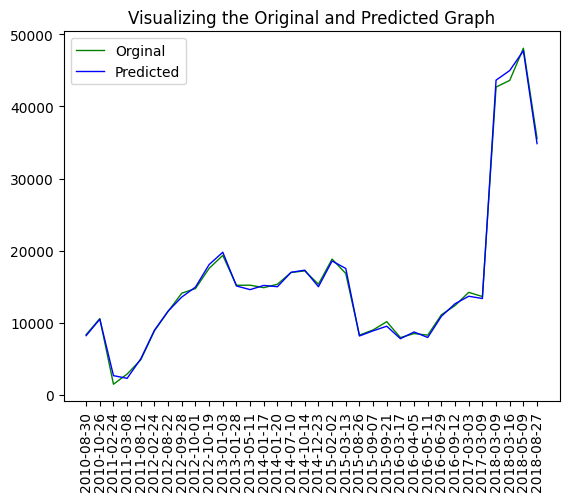

In [60]:
plt.plot(close_pred.index, close_pred['y_test'], color='green', linewidth=1, 
         label='Orginal')
plt.plot(close_pred.index, close_pred['y_pred'], color='blue', linewidth=1, 
         label='Predicted')
plt.title('Visualizing the Original and Predicted Graph')
plt.xticks(rotation=90)
plt.legend()

# <center>**Thank You**</center>